In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
# Table.interactive_plots()



### Table of Contents

1.  <a href='#section 1'>Filtering with "where"</a>

    a. <a href='#subsection 1a'> How to use "where"</a> <br><br>
    
2. <a href='#section 2'>Filtering with "take"</a>

3. <a href='#section 3'>Starting to visualize</a>

<a href='#section 4'>Optional question</a>


    


---

## The Data <a id='data'></a>

Today, we will continue work with the US census data, just looking at years 2010 and 2014. 
As a reminder, the `SEX` column contains numeric codes: `0` stands for the total, `1` for male, and `2` for female. The `AGE` column contains ages in completed years, but the special value `999` is a sum of the total population.



---


In [2]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
us_pop.sort('AGE')

SEX,AGE,2010,2014
0,0,3951330,3949775
1,0,2018420,2020326
2,0,1932910,1929449
0,1,3957888,3949776
1,1,2020332,2018401
2,1,1937556,1931375
0,2,4090862,3959664
1,2,2088685,2023673
2,2,2002177,1935991
0,3,4111920,4007079


## Filtering with `where`  <a id='section 1'></a>

Often, we only want to analyze a certain subset of our data at a time.

For example, let's filter our data to only look at the population counts of males.

<div class="alert alert-warning">
<b>Question 1:</b> What is the table's numeric code for males?
   </div>


<b>Answer: </b> YOUR ANSWER HERE

In [3]:
males_pop = us_pop.where('SEX', are.equal_to(1))
males_pop

SEX,AGE,2010,2014
1,0,2018420,2020326
1,1,2020332,2018401
1,2,2088685,2023673
1,3,2101272,2049596
1,4,2084312,2044517
1,5,2076573,2044339
1,6,2079410,2111060
1,7,2063139,2122832
1,8,2054462,2105618
1,9,2107037,2097690


Ignore the syntax for the moment.  Instead, try to read that line like this:

> Assign the name **`males_pop`** to a table whose rows are the rows in the **`us_pop`** table **`where`** the **`'SEX'`**s **`are` `equal` `to` `1`**.

As we can see in the above example, we've chosen only a subset of the rows of the original table - specifically the rows corresponding to male census participants.

<div class="alert alert-warning">
<b>Question 2:</b> Fill in the blanks to only select population counts corresponding to females.
   </div>

In [ ]:
females_pop = us_pop.where(..., are.equal_to(...))
females_pop

In [4]:
# ANSWER KEY
females_pop = us_pop.where('SEX', are.equal_to(2))
females_pop

SEX,AGE,2010,2014
2,0,1932910,1929449
2,1,1937556,1931375
2,2,2002177,1935991
2,3,2010648,1957483
2,4,1993239,1961199
2,5,1988080,1962561
2,6,1993603,2024870
2,7,1979907,2032494
2,8,1971142,2015285
2,9,2018378,2010659


<div class="alert alert-info">
<b>NOTE:</b> A special feature of `are.equal_to(...)` is that it is the default predicate for `tbl.where(...)`. This means if we write a `where` expression without `are.equal_to(...)`, then it would work as if it was there.
   </div>


Here is an example. We can assign the name **`ten_yr_males`** to a table whose rows are the rows in the **`males_pop`** table **`where`** the **`'AGE'`**s **`are` `equal` `to` `10`**.

In [5]:
ten_yr_males = males_pop.where("AGE", 10)
ten_yr_males

SEX,AGE,2010,2014
1,10,2142167,2100262


In [ ]:
## THIS WORKS THE SAME AS IF WE WERE TO INCLUDE are.equal_to(...)
males_pop.where("AGE", are.equal_to(10))

### `where` <a id='subsection 1a'></a>

Now let's dive into the details a bit more.  `where` takes 2 arguments:

1. The name of a column.  `where` finds rows where that column's values meet some condition.
2. A predicate that describes the condition that the column needs to meet.

The predicate in the examples above called the function `are.equal_to` with the values we wanted, 1 (or 2).  We'll see other predicates next.

`where` returns a table that's a copy of the original table, but **with only the rows that meet the given predicate**.

So far we've only been using `where` with the predicate that requires finding the values in a column to be *exactly* equal to a certain value. However, there are many other predicates. Here are a few:

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.equal_to`|`are.equal_to("hello")`|Find rows with values equal to "hello"|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|
|`are.containing`| `are.containing("i")`| Find rows with string values that contain the letter i.

Let's go back to the census data. 

In [ ]:
us_pop.sort("AGE", descending = True) # RUN THIS CELL

Remember the numerical code 999 stands for total (across all ages), but let's say we're only interested in specific ages (NOT their total). We could do another `where(...)` to accomplish this:

In [6]:
pop_by_age = us_pop.where("AGE", are.below(999)).sort("AGE", descending= True)
pop_by_age

SEX,AGE,2010,2014
2,100,45058,58008
1,100,9352,13618
0,100,54410,71626
2,99,26074,32517
1,99,6104,8951
0,99,32178,41468
2,98,37532,46208
1,98,9505,13518
0,98,47037,59726
2,97,54118,62779


<div class="alert alert-warning">
<b>Question 3:</b> Fill in the blanks to only select population counts corresponding to males and females (but not their totals.) **Hint**: Remember, in the SEX column, 0 represents total.
   </div>


In [ ]:
both_sexes = pop_by_age.where("...", are.above(...))
both_sexes

In [7]:
# ANSWER KEY
both_sexes = pop_by_age.where("SEX", are.above(0))
both_sexes

SEX,AGE,2010,2014
2,100,45058,58008
1,100,9352,13618
2,99,26074,32517
1,99,6104,8951
2,98,37532,46208
1,98,9505,13518
2,97,54118,62779
1,97,14775,20310
2,96,75139,89432
1,96,22022,31053


<div class="alert alert-info">
<b>NOTE:</b> One of the nice things about code is that there are several ways to do something. Here is another `where` expression which will do the same thing as using `are.above(...)`
   </div>

In [ ]:
both_sexes = pop_by_age.where("SEX", are.between(1, 3))
both_sexes

<div class="alert alert-warning">
<b>Question 4:</b> What is another way to write this using `are.between_or_equal_to(...)`
   </div>

In [ ]:
both_sexes = pop_by_age.where("SEX", are.between_or_equal_to(..., ...))
both_sexes

These are all different ways to write the same expression. Some predicates are used more often than others, but there is not an added benefit to using `are.above` or `are.between` in the situation above. Both work the same. The only benefit would be less typing for the first option. 

<div class="alert alert-warning">
<b>Question 5:</b> Why does this code not produce the same table as the other above in Question 3 & 4?
   </div>

In [ ]:
pop_by_age.where("SEX", are.equal_to(1)).where("SEX", are.equal_to(2))

<b>Answer: </b> YOUR ANSWER HERE

## 2. Filtering with "take" <a id='section 2'></a>

Let's combine what we did above to remove totals of ages and sex, and only look at the year 2014. This table has information on both males and females of all ages in the year 2014.

In [8]:
# RUN THIS CELL
us_pop_2014 = us_pop.where("SEX", are.above(0)).where("AGE", are.below(999)).drop("2010")
us_pop_2014_sorted = us_pop_2014.sort("AGE", descending = True)
us_pop_2014_sorted 

SEX,AGE,2014
2,100,58008
1,100,13618
2,99,32517
1,99,8951
2,98,46208
1,98,13518
2,97,62779
1,97,20310
2,96,89432
1,96,31053


Remember, `tbl.take()` allows us to specify which row numbers of the above table we want to look at. Each row has an index like an array, which is the numbers we reference inside of `take(...)`

In [ ]:
# RUN THIS CELL
us_pop_2014_sorted.take(0) 

This lets us look at just the first row of the table. (Remember, row numbers start with 0!)

<div class="alert alert-warning">
<b>Question 6:</b> Fill in the blanks to only select population counts corresponding to males and females between ages <b> 98 - 100 </b>.**Hint: how many rows of the above table do we want?**
   </div>
   

In [ ]:
## YOUR CODE HERE
seniors_2014 = us_pop_2014_sorted.take(np.arange(..., ...))
seniors_2014

In [9]:
# ANSWER KEY
seniors_2014 = us_pop_2014_sorted.take(np.arange(0,6)) ## YOUR CODE HERE
seniors_2014

SEX,AGE,2014
2,100,58008
1,100,13618
2,99,32517
1,99,8951
2,98,46208
1,98,13518


<div class="alert alert-info">
<b>NOTE:</b> Another way to write this code is to use where. We only want AGES between 98 and 100.
   </div>
   

In [10]:
seniors_2014 = us_pop_2014_sorted.where("AGE", are.between(98, 101)) 
seniors_2014

SEX,AGE,2014
2,100,58008
1,100,13618
2,99,32517
1,99,8951
2,98,46208
1,98,13518


<div class="alert alert-warning">
<b>Question 7:</b> What do you notice about the above table? 
   </div>

<b> ANSWER: </b> ...

<b> ANSWER: </b>
   Notice the differences in population counts between males and females (more females than males in this age range) 

## Starting to Visualize  <a id='section 3'></a>

To answer question 7, it would be easier to create a visualization using this table. Let's compare AGE versus the population in 2014.

In this case, "AGE" is acting like a categorical variable, while "2014" is a numerical variable. These are the two variables we need to make a bar chart. 

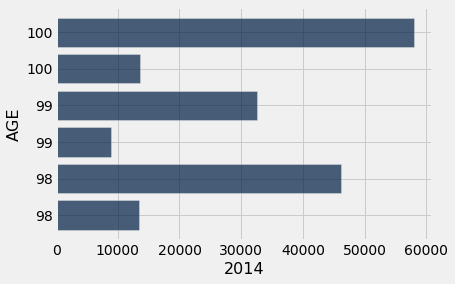

In [11]:
## THIS CREATES A BAR CHART FOR AGE GROUPS AND THEIR POPULATION SIZE IN 2014
seniors_2014.barh("AGE", "2014")

<div class="alert alert-warning">
<b>Question 8:</b> What do you notice about the chart? Why are there two of each type of AGE? 
   </div>

<b> ANSWER: </b> ...

<div class="alert alert-warning">
<b>Question 9:</b> How does the bar chart compare with the table called `seniors_2014`?
   </div>


<b> ANSWER: </b> ...

## Optional question on `where(...)` and strings:  <a id='section 4'></a>

If our original table had sex represented as text or a string, then we would have to use a different where expression to choose between males and females.

In [ ]:
## THIS CODE ADDS THE STRING VERSION OF SEX IN A NEW COLUMN

fem_str = females_pop.with_column("SEX (str)" ,"female")
male_str = males_pop.with_column("SEX (str)" , "male")

str_sex = fem_str.with_rows(male_str.rows).sort('AGE', descending=True)
str_sex

Let's try to only get rows with females. There are multiple ways to do this.

In [ ]:
## OPTION 1: uses are.equal_to(...) to find rows where "SEX (str)" is equal to "female"
str_sex.where("SEX (str)", are.equal_to("female"))

In [ ]:
## OPTION 2: uses the default argument of are.equal_to(...) 
## to find rows where "SEX (str)" is equal to "female"
str_sex.where("SEX (str)", "female")

In [ ]:
## OPTION 3: uses containing to find strings that 
## have the letters "f" and "e" inside in that order
str_sex.where("SEX (str)", are.containing("fe"))

In [ ]:
## OPTION 4: uses below to find strings that come earlier 
## in the alphabet than the letter "g". 
## a is like 0 and z is like 26
str_sex.where("SEX (str)", are.below("g"))

See if you can come up with another way to create the table above using `are.not_equal_to(...)`

In [ ]:
str_sex.where("SEX (str)", are.not_equal_to(...))

---

## Bibliography

- John Denero - Data 8X, Census: Males and Females. https://www.youtube.com/watch?v=SAJavz58uHk&feature=youtu.be
- Data 8 Spring 2020 - Lab 02. http://data8.org/sp20/

---
Notebook developed by: Alleanna, Ashley, Pratibha

Data Science Modules: http://data.berkeley.edu/education/modules
